In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
# whale_returns = returns of some famous "whale" investor's portfolios
# algo_returns = returns from the in-house trading algorithms in the company
# sp500 = historical closing prices of the S&P 500 index

# Changing index to datetime as well as reading the csv's
whale_returns = pd.read_csv("whale_returns.csv")
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True), inplace=True)
whale_returns.drop("Date", axis=1, inplace=True)

algo_returns = pd.read_csv("algo_returns.csv")
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format=True), inplace=True)
algo_returns.drop("Date", axis=1, inplace=True)

sp500 = pd.read_csv("sp500_history.csv")
sp500.set_index(pd.to_datetime(sp500['Date'], infer_datetime_format=True), inplace=True)
sp500.drop("Date", axis=1, inplace=True)

In [3]:
# Making sure it switched to date-time correctly
type(whale_returns.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [4]:
### Read whale returns
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
### Determine % of nulls in whale returns
whale_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [6]:
# Dropping nulls in whale returns
whale_returns.dropna(inplace = True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
# Reading algorithmic returns
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Dropping nulls for algorithmic returns
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
# Read S&P Closing prices
sp500 = sp500.sort_index()
sp500.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
#Check the data type
sp500.dtypes

Close    object
dtype: object

In [11]:
# Removing $$ signs
sp500["Close"] = sp500["Close"].str.replace("$", "")
sp500["Close"] = sp500["Close"].str.replace(",", "")
sp500["Close"] = sp500["Close"].astype("float")

/var/folders/0l/96dc8s_577d69ky0rsg_8fd00000gn/T/ipykernel_72476/1256349639.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500["Close"] = sp500["Close"].str.replace("$", "")


In [12]:
sp500.dtypes

Close    float64
dtype: object

In [13]:
# Daily returns in SP 500
daily_returns_sp500 = sp500.pct_change()
daily_returns_sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
#Dropping nulls
daily_returns_sp500.dropna(inplace=True)
daily_returns_sp500.isnull().sum()
daily_returns_sp500.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [15]:
# Rename "close" column to be specific with portfolio
daily_returns_sp500.columns = ["SP500"]
daily_returns_sp500.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Use the concat function to concat Dataframes: Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data_columns = pd.concat([whale_returns, algo_returns, daily_returns_sp500], axis="columns", join= "inner")
joined_data_columns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


<AxesSubplot:xlabel='Date'>

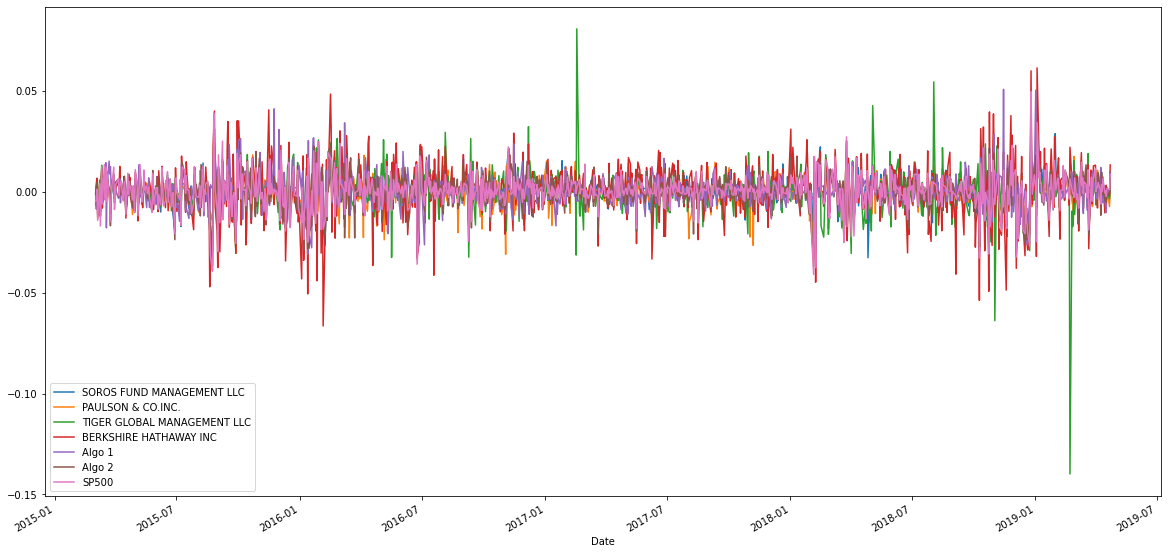

In [17]:
# Plot daily returns of all portfolios
# daily_returns_all = joined_data_columns.pct_change()
joined_data_columns.plot(figsize=(20,10))

In [18]:
# Does any portfolio outperform the S&P 500?
print("Berkshire Hathaway, Soros Fund Management, and Algo 2 all outperformed the SP Closing Price at one point in the data set")

Berkshire Hathaway, Soros Fund Management, and Algo 2 all outperformed the SP Closing Price at one point in the data set


<AxesSubplot:xlabel='Date'>

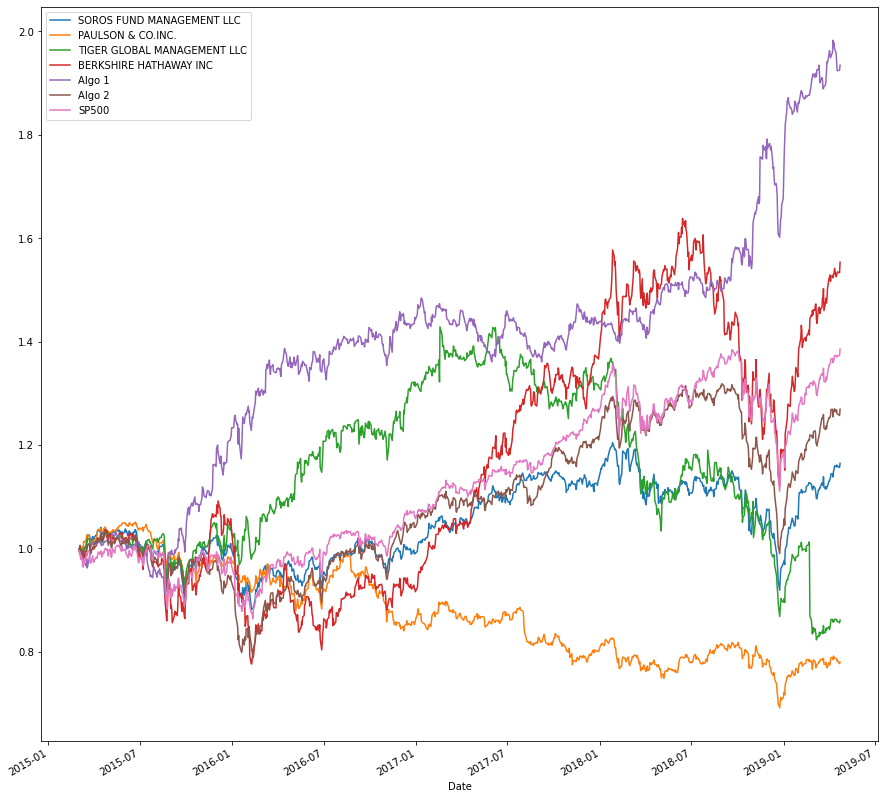

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data_columns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,15))

Daily Returns for SP 500 Portfolio


<AxesSubplot:>

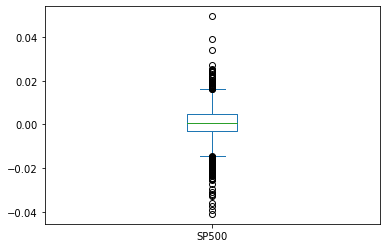

In [20]:
# Plot the box portfolio for each
print("Daily Returns for SP 500 Portfolio")
daily_returns_sp500.plot(kind="box")

In [21]:
dr_algo = algo_returns.pct_change()
dr_whale = whale_returns.pct_change()

combined_returns_part1 = pd.concat([dr_algo, dr_whale, daily_returns_sp500], axis="columns", join="inner")
combined_returns_part1

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500
Date,,,,,,,
2015-03-03,-0.761929,-1.296713,NaN,NaN,NaN,NaN,-0.004539
2015-03-04,3.422374,-3.544766,-2.762070,-1.650792,4.113646,-1.641381,-0.004389
2015-03-05,-0.888803,0.789231,0.800968,0.257544,-1.929234,0.596558,0.001196
2015-03-06,4.190043,-3.650914,-2.968465,-1.876837,-4.601872,-2.947282,-0.014174
2015-03-09,0.098917,-1.113716,-1.073656,-2.182252,-1.688907,-0.873840,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.603391,-1.634218,-2.898341,-1.335693,-3.088322,-1.079744,0.000509
2019-04-17,0.483294,-2.803170,-2.073108,-17.661104,4.306537,2.851033,-0.002274
2019-04-18,-0.942926,-0.764890,-1.499843,-1.188925,-1.131886,-0.405345,0.001579


Daily Returns for Algo Portfolio


<AxesSubplot:>

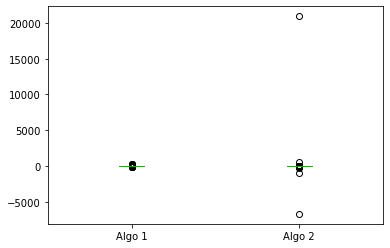

In [22]:
# Plot the box portfolio for each
print("Daily Returns for Algo Portfolio")
dr_algo.plot(kind="box")

Daily Returns for Whale Portfolio


/Users/jarredspencer/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


<AxesSubplot:>

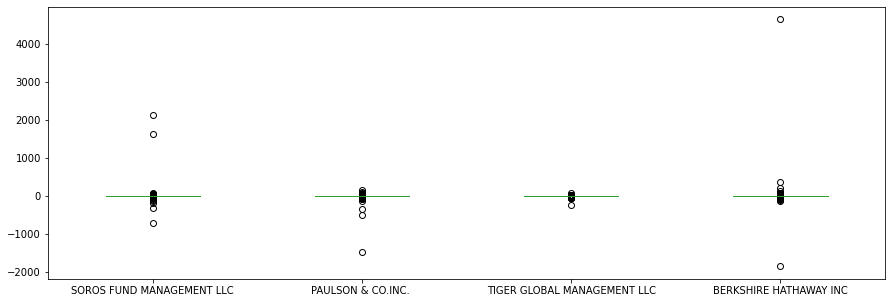

In [23]:
# Plot the box portfolio for each
print("Daily Returns for Whale Portfolio")
dr_whale.plot(kind="box", figsize=(15,5))

<AxesSubplot:>

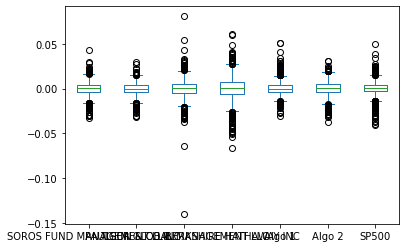

In [24]:
# Plot all box portfolios
joined_data_columns.plot(kind="box")

In [25]:
# Standard deviation for all portfolios
daily_std_all = joined_data_columns.std()
daily_std_all.head()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
dtype: float64

In [26]:
# Calculating the stock with most risk by putting them in descending order
daily_std_all = daily_std_all.sort_values(ascending=False)
daily_std_all.head(10)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [27]:
# Which portfolio is riskiest?
print("Which portfolio is riskiest?")
print("Berkshire Hathaway, INC")

Which portfolio is riskiest?
Berkshire Hathaway, INC


In [28]:
# Caclulate annualized standard deviation
annualized_std_all = daily_std_all * np.sqrt(252)
annualized_std_all.head()

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
dtype: float64

<AxesSubplot:xlabel='Date'>

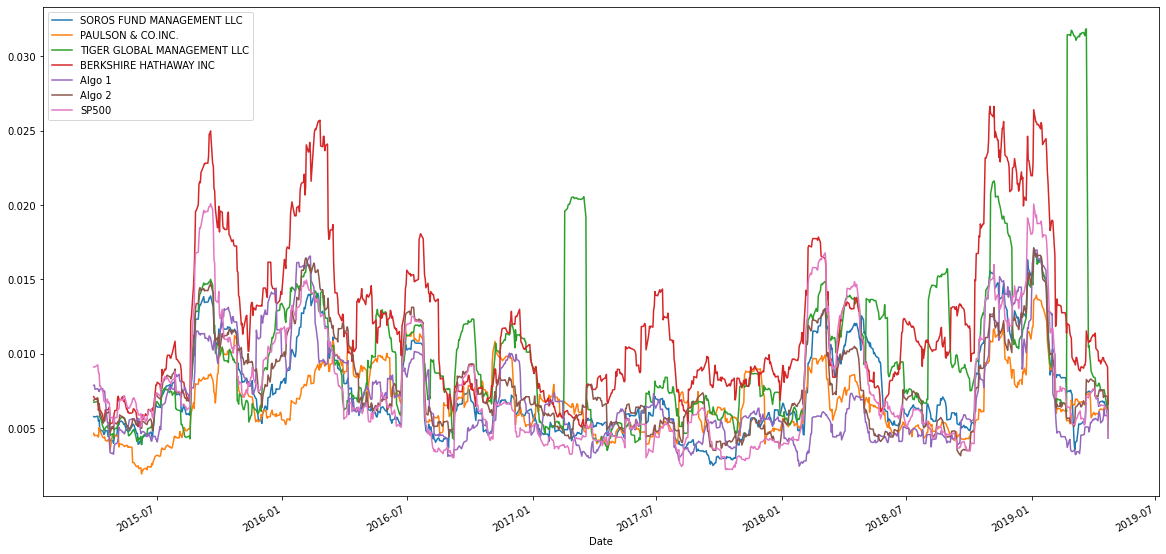

In [29]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21 day window
joined_data_columns.rolling(window=21).std().plot(figsize=(20,10))

In [30]:
# Calculate and plot the correlation between each stock to determine which portfolios may mimick the S&P 500.
joined_data_columns.columns = ["SOROS", "PAULSON & CO", "TIGER GLOBAL", "BERK HATH", "ALGO 1", "ALGO 2", "SP500"]
correlation = joined_data_columns.corr()
correlation.style.background_gradient(cmap="summer")

,SOROS,PAULSON & CO,TIGER GLOBAL,BERK HATH,ALGO 1,ALGO 2,SP500
SOROS,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERK HATH,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
ALGO 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
ALGO 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:xlabel='Date'>

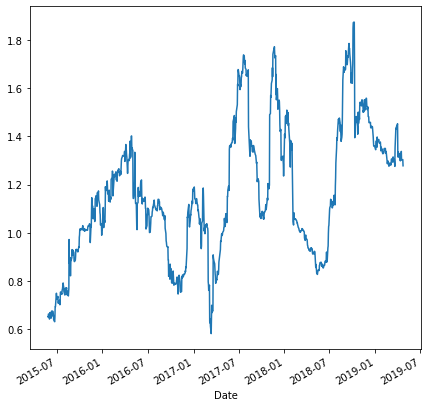

In [31]:
#Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500.
covariance = joined_data_columns["BERK HATH"].cov(joined_data_columns["SP500"])
variance_sp500 = joined_data_columns["SP500"].var()
rolling_covariance = joined_data_columns["BERK HATH"].rolling(window=60).cov(joined_data_columns["SP500"])
rolling_variance = joined_data_columns["SP500"].rolling(window=60).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(7,7))

In [32]:
sharpe_ratio = joined_data_columns.mean()/joined_data_columns.std()
asr = sharpe_ratio*252**.5
asr

SOROS           0.356417
PAULSON & CO   -0.483570
TIGER GLOBAL   -0.121060
BERK HATH       0.621810
ALGO 1          1.378648
ALGO 2          0.501364
SP500           0.648267
dtype: float64

<AxesSubplot:>

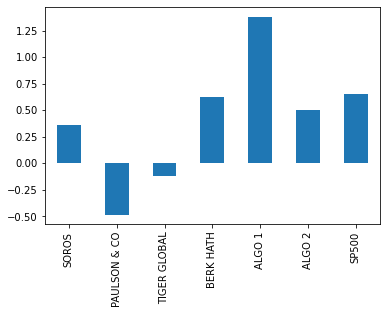

In [33]:
asr.plot(kind="bar")

In [34]:
# Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
print("Algo 1 outperformed SP 500 and Whale Return, Algo 2 did not")

Algo 1 outperformed SP 500 and Whale Return, Algo 2 did not


In [35]:
# Reading data from 1st stock & add symbol
costco = pd.read_csv("cost_historical.csv", index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

# Reading data from 2nd stock & add symbol
google = pd.read_csv("goog_historical.csv", index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

# Reading data from 3rd stock & add symbol
apple = pd.read_csv("aapl_historical.csv", index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

# Combine all stocks in a single DataFrame
stocks = pd.concat([costco,google,apple], axis="rows", join="inner")
stocks.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [36]:
# Reset index
stocks = stocks.reset_index()

In [37]:
# Pivot tables
portfolio = stocks.pivot_table(values="NOCP", index="Trade DATE", columns= "Symbol")
portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [38]:
# Calculate daily returns and drop NA's - dispaly sample data
daily_return = portfolio.pct_change()
daily_return.head()
daily_return.dropna().head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [39]:
 # Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_return.dot(weights)
portfolio_returns.pct_change()
portfolio_returns.dropna()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

<AxesSubplot:xlabel='Trade DATE'>

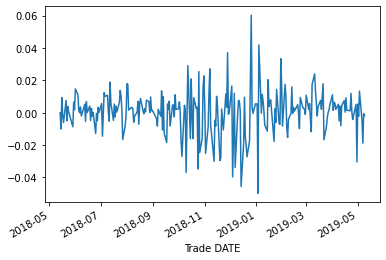

In [40]:
# Plot the data 
portfolio_returns.plot()

In [41]:
 # Join your returns DataFrame to the original returns DataFrame
joined_data_columns["combined_df"] = portfolio_returns
joined_data_columns.dropna(inplace=True)
joined_data_columns.head()

,SOROS,PAULSON & CO,TIGER GLOBAL,BERK HATH,ALGO 1,ALGO 2,SP500,combined_df
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [42]:
# Calculate the Annualized Standard Deviation
daily_std = joined_data_columns.std()
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

SOROS           0.146675
PAULSON & CO    0.116732
TIGER GLOBAL    0.232531
BERK HATH       0.247155
ALGO 1          0.133704
dtype: float64

<AxesSubplot:xlabel='Date'>

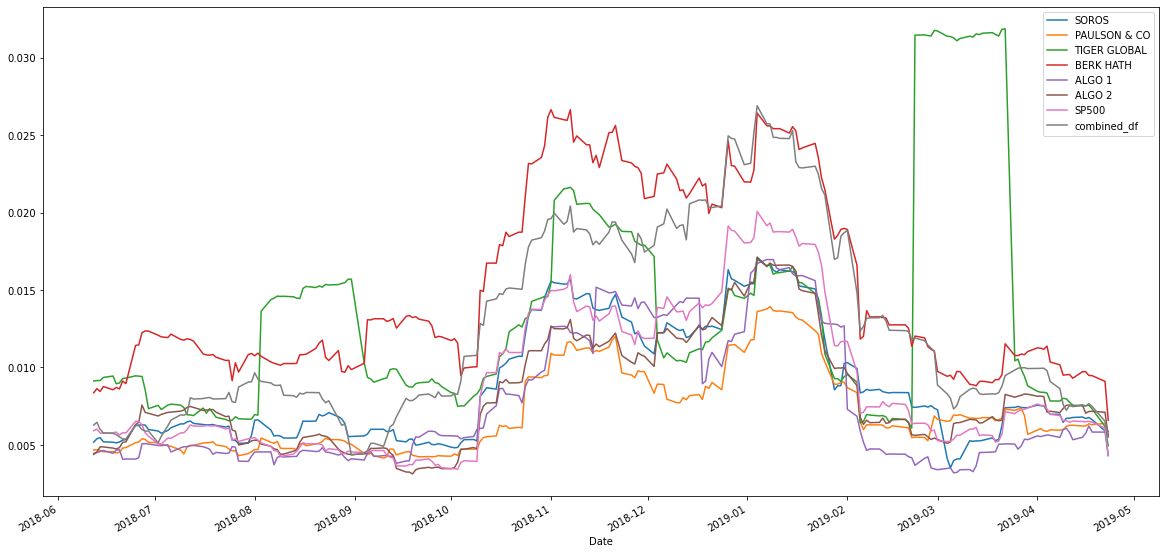

In [43]:
# Calculate and plot rolling std with a 21-day window.
joined_data_columns.rolling(window=21).std().plot(figsize=(20,10))

In [44]:
#Calculate and plot the correlation
correlation_two = joined_data_columns.corr()
correlation_two

,SOROS,PAULSON & CO,TIGER GLOBAL,BERK HATH,ALGO 1,ALGO 2,SP500,combined_df
SOROS,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERK HATH,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
ALGO 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
ALGO 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
SP500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
combined_df,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


<AxesSubplot:>

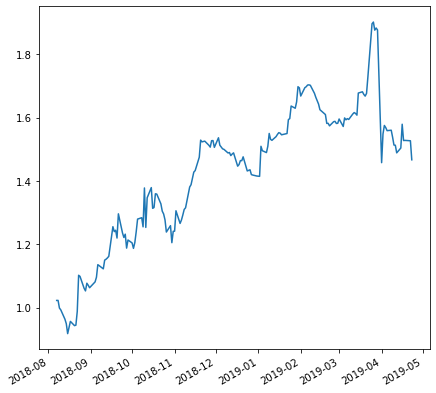

In [45]:
# Calculate and plot beta for your portfolio compared to the S&P 60 TSX.
covariance_mp = daily_return["AAPL"].cov(joined_data_columns["SP500"])                             
apple_beta = covariance_mp / variance_sp500
rolling_covariance = daily_return["AAPL"].rolling(window=60).cov(joined_data_columns["SP500"])
rolling_variance = joined_data_columns["SP500"].rolling(window=60).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(7,7))

<AxesSubplot:>

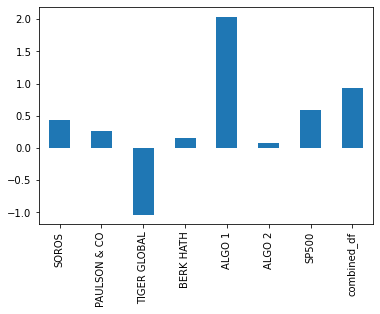

In [46]:
#Calculate the Sharpe ratios and generate a bar plot
sharpe_ratio = joined_data_columns.mean()/joined_data_columns.std()
asr = sharpe_ratio*252**.5
asr.plot(kind="bar")

In [47]:
#How does your portfolio do?
print("My portfolio outperformed all portfolios except Algo 1 with a +1 return")

My portfolio outperformed all portfolios except Algo 1 with a +1 return
